# NiN卷积神经网络实现

In [2]:
!pip install d2l

     |████████████████████████████████| 83 kB 1.0 MB/s 


In [3]:
import torch
from torch import nn
from d2l import torch as d2l

In [4]:
def nin_block(in_channels, out_channels, kernel_size, stride, padding):
    return nn.Sequential(
        nn.Conv2d(in_channels, out_channels, kernel_size, padding=padding, stride=stride),
        nn.ReLU(),
        nn.Conv2d(out_channels, out_channels, kernel_size=1),
        nn.ReLU(),
        nn.Conv2d(out_channels, out_channels, kernel_size=1),
        nn.ReLU()
    )

In [5]:
net = nn.Sequential(
    nin_block(1, 96, kernel_size=11, stride=4, padding=0),
    nn.MaxPool2d(3, stride=2),
    nin_block(96, 256, kernel_size=5, stride=1, padding=2),
    nn.MaxPool2d(3, stride=2),
    nin_block(256, 384, kernel_size=3, stride=1, padding=1),
    nn.MaxPool2d(3, stride=2),
    nn.Dropout(0.5),
    nin_block(384, 10, kernel_size=3, stride=1, padding=1),
    nn.AdaptiveAvgPool2d((1, 1)),
    nn.Flatten()
    
)

In [ ]:
# 在实际的项目当中，我们往往预先只知道的是输入数据和输出数据的大小，而不知道核与步长的大小。
# 如果使用上面的方法创建汇聚层，我们每次都需要手动计算核的大小和步长的值。
# 而自适应（Adaptive）能让我们从这样的计算当中解脱出来，只要我们给定输入数据和输出数据的大小，
# 自适应算法能够自动帮助我们计算核的大小和每次移动的步长
m = nn.AdaptiveAvgPool2d((5, 5))

In [ ]:
X = torch.rand(size=(1, 64, 7, 8))
m(X).shape

torch.Size([1, 64, 5, 5])

In [ ]:
X = torch.rand(size=(1, 1, 224, 224))
for layer in net:
    X = layer(X)
    print(layer.__class__.__name__,'Output Shape: ', X.shape)

Sequential Output Shape:  torch.Size([1, 96, 54, 54])
MaxPool2d Output Shape:  torch.Size([1, 96, 26, 26])
Sequential Output Shape:  torch.Size([1, 256, 26, 26])
MaxPool2d Output Shape:  torch.Size([1, 256, 12, 12])
Sequential Output Shape:  torch.Size([1, 384, 12, 12])
MaxPool2d Output Shape:  torch.Size([1, 384, 5, 5])
Dropout Output Shape:  torch.Size([1, 384, 5, 5])
Sequential Output Shape:  torch.Size([1, 10, 5, 5])
AdaptiveAvgPool2d Output Shape:  torch.Size([1, 10, 1, 1])
Flatten Output Shape:  torch.Size([1, 10])


/Users/wenyalan/opt/anaconda3/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ../c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [6]:
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size=128, resize=224)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ../data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ../data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ../data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ../data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ../data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ../data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ../data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/FashionMNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid poten

loss 0.511, train acc 0.838, test acc 0.822
445.6 examples/sec on cuda:0


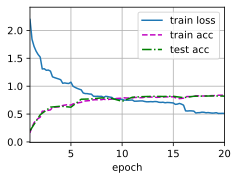

In [8]:
lr, num_epochs = 0.1, 20
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())

In [ ]:
d2l.train_ch6?

In [10]:
# 剔除一层1x1卷积层
def nin_block(in_channels, out_channels, kernel_size, stride, padding):
    return nn.Sequential(
        nn.Conv2d(in_channels, out_channels, kernel_size, padding=padding, stride=stride),
        nn.ReLU(),
        nn.Conv2d(out_channels, out_channels, kernel_size=1),
        nn.ReLU()
    )


net = nn.Sequential(
    nin_block(1, 96, kernel_size=11, stride=4, padding=0),
    nn.MaxPool2d(3, stride=2),
    nin_block(96, 256, kernel_size=5, stride=1, padding=2),
    nn.MaxPool2d(3, stride=2),
    nin_block(256, 384, kernel_size=3, stride=1, padding=1),
    nn.MaxPool2d(3, stride=2),
    nn.Dropout(0.5),
    nin_block(384, 10, kernel_size=3, stride=1, padding=1),
    nn.AdaptiveAvgPool2d((1, 1)),
    nn.Flatten()
    
)

loss 0.355, train acc 0.868, test acc 0.865
635.6 examples/sec on cuda:0


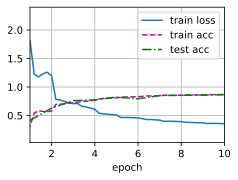

In [11]:
lr, num_epochs = 0.1, 10
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())